# Term Project: Determining the Skyline of Rectangular Buildings  

This project focuses on computing the skyline of a set of rectangular buildings using a divide-and-conquer algorithm. The solution involves merging overlapping and adjacent building outlines to form a continuous, non-overlapping skyline.

### Course Information
- **Institution**: King Saud University, College of Computer & Information Sciences  
- **Course**: CSC512 - Computer Algorithms  
- **Semester**: First Semester 1446 AH (Fall 2024)  

### Project Details
- **Prepared by**: Maha Abdulaziz Alhazzani, 446201187
- **Supervised by**: Prof. Aqil Azmi
- **Date**: November 11, 2024  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Merging Two Skylines
The `merge_skylines` function merges two individual skylines into a continuous skyline by evaluating and merging the heights at each x-coordinate. It employs a two-pointer technique to traverse through the given skylines and handles overlapping and adjacent segments efficiently.

In [2]:
def merge_skylines(left, right):
    """
    Merges two skylines into one continuous skyline by considering the maximum heights at each x-coordinate.
    Parameters:
        left (list of tuples): The left skyline represented as (x, height).
        right (list of tuples): The right skyline represented as (x, height).
    Returns:
        list of tuples: The merged skyline as (x, height).
    """
    result = []  # Resultant merged skyline
    h1 = h2 = 0  # Initial heights for left and right skylines
    i = j = 0  # Pointers to traverse left and right skylines

    # Merge left and right skylines based on x-coordinates
    while i < len(left) and j < len(right):
        if left[i][0] < right[j][0]:
            x, h1 = left[i]  # Update height from the left skyline
            max_h = max(h1, h2)
            i += 1
        elif left[i][0] > right[j][0]:
            x, h2 = right[j]  # Update height from the right skyline
            max_h = max(h1, h2)
            j += 1
        else:  # When both x-coordinates are the same
            x, h1 = left[i]
            _, h2 = right[j]
            max_h = max(h1, h2)
            i += 1
            j += 1

        # Only append to the result if the height changes
        if not result or result[-1][1] != max_h:
            result.append((x, max_h))

    # Append remaining points from either skyline
    result.extend(left[i:])
    result.extend(right[j:])
    return result


## Computing the Skyline Using Divide-and-Conquer
The `get_skyline` function computes the skyline of a list of buildings using a divide-and-conquer strategy. It splits the buildings into smaller subproblems, computes their skylines, and then merges them using the `merge_skylines` function.

In [3]:
def get_skyline(buildings):
    """
    Recursively computes the skyline for a list of buildings using the divide-and-conquer approach.
    Parameters:
        buildings (list of tuples): List of buildings represented as (L, H, R), 
                                    where L is the left x-coordinate, H is the height, and R is the right x-coordinate.
    Returns:
        list of tuples: The computed skyline as (x, height).
    """
    if not buildings:
        return []
    if len(buildings) == 1:
        l, h, r = buildings[0]
        return [(l, h), (r, 0)]  # Return skyline for a single building

    # Divide the list of buildings into left and right halves
    mid = len(buildings) // 2
    left_skyline = get_skyline(buildings[:mid])
    right_skyline = get_skyline(buildings[mid:])

    # Merge the results of the left and right skylines
    return merge_skylines(left_skyline, right_skyline)


## Visualizing the Skyline and Buildings
The `plot_skyline_with_matplotlib` function visualizes the input buildings and the computed skyline using `matplotlib`. It provides a graphical representation of how the skyline relates to the input data, enhancing the understanding of the algorithm's output.

In [4]:
def plot_skyline_with_matplotlib(buildings, skyline):
    """
    Visualizes the input buildings and the computed skyline using matplotlib.
    Parameters:
        buildings (list of tuples): List of buildings represented as (L, H, R).
        skyline (list of tuples): Computed skyline as a list of (x, height).
    """
    fig, ax = plt.subplots(figsize=(12, 7))

    # Define pastel colors for buildings for a more appealing visualization
    pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']
    
    # Plot each building as a rectangle and label it for clarity
    for idx, (l, h, r) in enumerate(buildings):
        color = pastel_colors[idx % len(pastel_colors)]  # Cycle through pastel colors
        rect = patches.Rectangle(
            (l, 0), r - l, h,
            edgecolor='black',
            facecolor=color,
            alpha=0.7,
            linewidth=1.5
        )
        ax.add_patch(rect)
        # Annotate each building with its details
        ax.text(
            l + (r - l) / 2, h + 1,  # Position text at the center top of the building
            f"Building {idx + 1} ({l},{h},{r})",
            ha='center', fontsize=10, color='darkblue', fontweight='bold'
        )

    # Plot the computed skyline using a step function
    x_skyline = [point[0] for point in skyline]
    y_skyline = [point[1] for point in skyline]
    ax.step(x_skyline, y_skyline, where='post', color='red', linewidth=2, label="Skyline")

    # Add titles, labels, and customize the grid and background
    ax.set_title('Skyline Problem Visualization', fontsize=16, fontweight='bold')
    ax.set_xlabel('X-coordinate', fontsize=12)
    ax.set_ylabel('Height', fontsize=12)
    ax.legend()
    ax.grid(visible=True, linestyle='--', alpha=0.7)
    ax.set_facecolor('whitesmoke')

    # Set axis limits to provide adequate space for visualization
    ax.set_xlim(0, max([r for _, _, r in buildings]) + 5)
    ax.set_ylim(0, max([h for _, h, _ in buildings]) + 5)

    plt.show()

## Test and Implementation 
The main block initializes example data for buildings, computes their skyline using the `get_skyline` function, and visualizes the result using the `plot_skyline_with_matplotlib` function.

Example 1 - Computed Skyline: [(1, 11), (5, 8), (7, 15), (15, 20), (22, 0)]


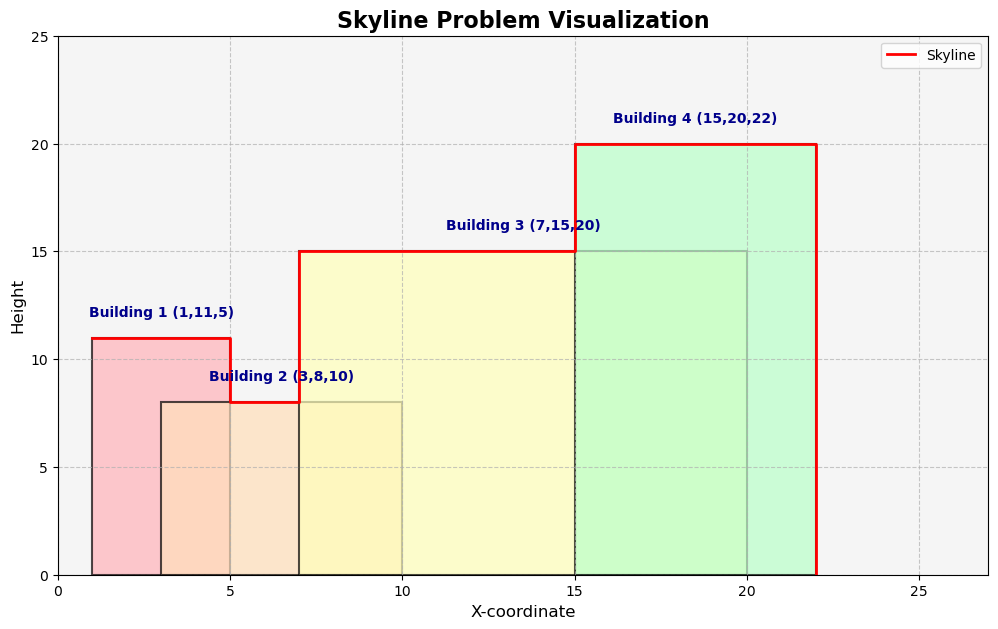

In [5]:
# Example 1
buildings = [(1, 11, 5), (3, 8, 10), (7, 15, 20), (15, 20, 22)]
skyline = get_skyline(buildings)
print("Example 1 - Computed Skyline:", skyline)
plot_skyline_with_matplotlib(buildings, skyline)

Example 2 - Computed Skyline: [(2, 6), (5, 10), (9, 15), (16, 7), (19, 12), (24, 0)]


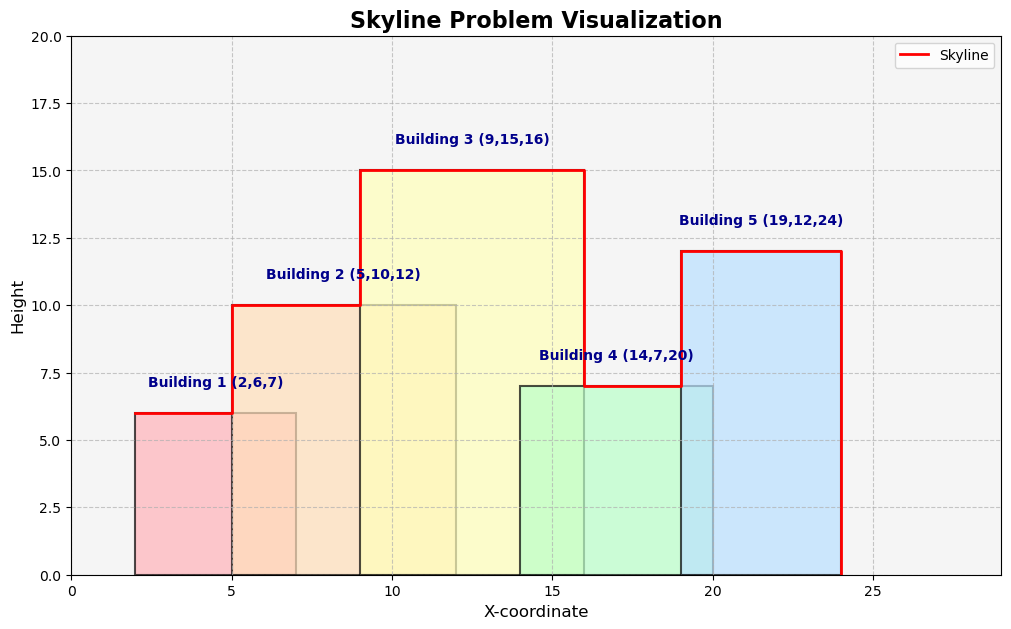

In [6]:
# Example 2
buildings = [(2, 6, 7), (5, 10, 12), (9, 15, 16), (14, 7, 20), (19, 12, 24)]
skyline = get_skyline(buildings)
print("Example 2 - Computed Skyline:", skyline)
plot_skyline_with_matplotlib(buildings, skyline)

Example 3 - Computed Skyline: [(1, 10), (5, 8), (10, 6), (15, 0)]


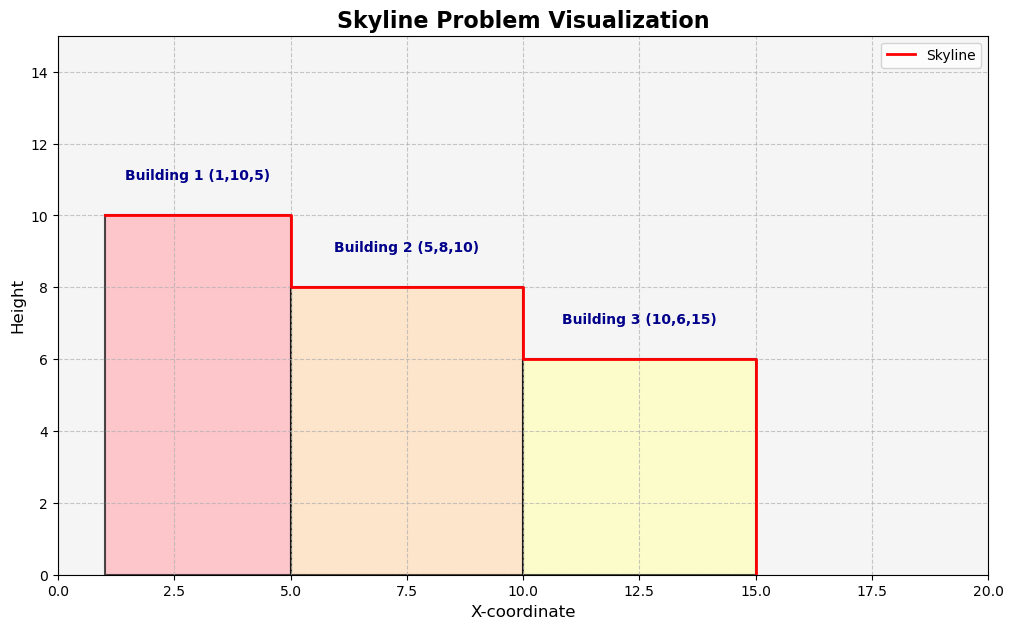

In [7]:
# Example 3 (Edge Case)
buildings = [(1, 10, 5), (5, 8, 10), (10, 6, 15)]
skyline = get_skyline(buildings)
print("Example 3 - Computed Skyline:", skyline)
plot_skyline_with_matplotlib(buildings, skyline)